# **Project: Predicting Employee Turnover Using HR Analytics.**

### Task:

Question: what’s likely to make the employee leave the company?

Goals: Analyze the data collected by the HR department and build a model that predicts whether or not an employee will leave the company.



### The HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

- Understanding the variables
- Clean the dataset (missing data, redundant data, outliers)



In [3]:
df0.shape
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns={
    "average_montly_hours": "average_monthly_hours",
    "Work_accident": "work_accident"
})
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
df0.duplicated().sum()

3008

In [9]:
df0[df0.duplicated(keep=False)].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df = df0.drop_duplicates()
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


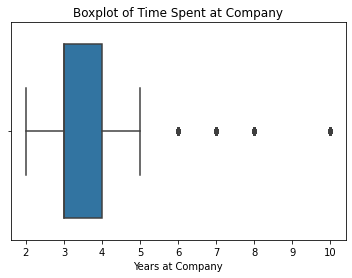

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["time_spend_company"])
plt.title("Boxplot of Time Spent at Company")
plt.xlabel("Years at Company")
plt.show()

In [12]:
Q1 = df["time_spend_company"].quantile(0.25)
Q3 = df["time_spend_company"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df["time_spend_company"] < Q1 - 1.5 * IQR) |
    (df["time_spend_company"] > Q3 + 1.5 * IQR)
]

outliers.shape[0]

824

## Visualizations

In [13]:
df["left"].value_counts()
df["left"].value_counts(normalize=True) * 100

0    83.39588
1    16.60412
Name: left, dtype: float64

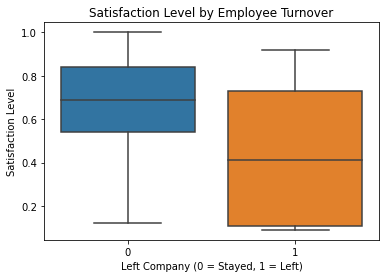

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x="left", y="satisfaction_level", data=df)
plt.title("Satisfaction Level by Employee Turnover")
plt.xlabel("Left Company (0 = Stayed, 1 = Left)")
plt.ylabel("Satisfaction Level")
plt.show()

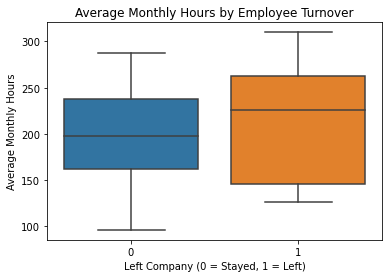

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="left", y="average_monthly_hours", data=df)
plt.title("Average Monthly Hours by Employee Turnover")
plt.xlabel("Left Company (0 = Stayed, 1 = Left)")
plt.ylabel("Average Monthly Hours")
plt.show()

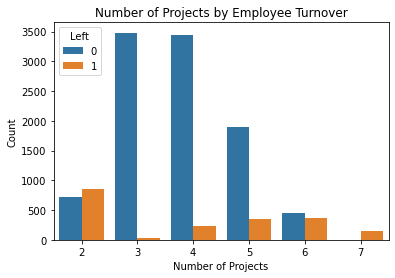

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="number_project", hue="left", data=df)
plt.title("Number of Projects by Employee Turnover")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(title="Left")
plt.show()

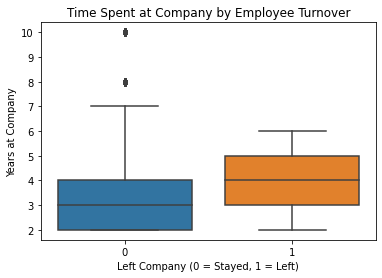

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="left", y="time_spend_company", data=df)
plt.title("Time Spent at Company by Employee Turnover")
plt.xlabel("Left Company (0 = Stayed, 1 = Left)")
plt.ylabel("Years at Company")
plt.show()

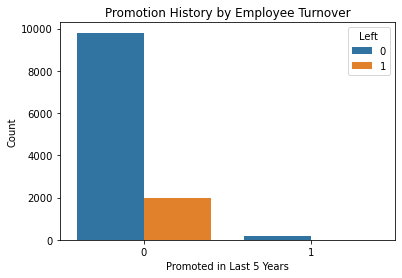

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="promotion_last_5years", hue="left", data=df)
plt.title("Promotion History by Employee Turnover")
plt.xlabel("Promoted in Last 5 Years")
plt.ylabel("Count")
plt.legend(title="Left")
plt.show()

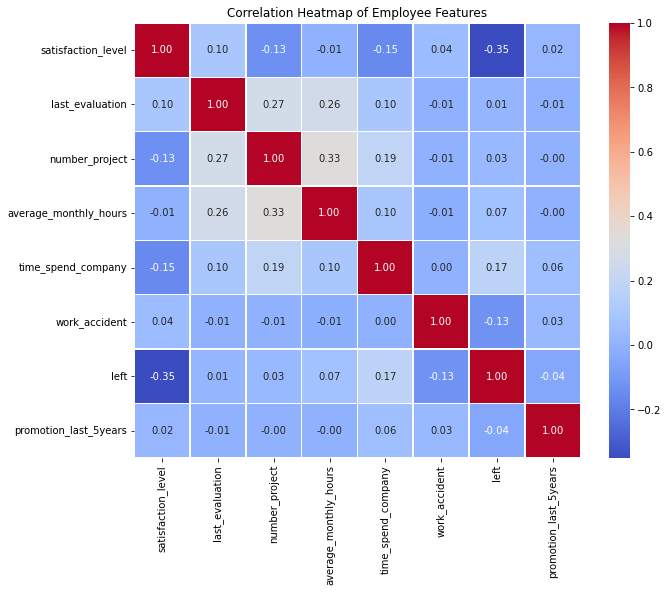

In [17]:
plt.figure(figsize=(10, 8))

corr_matrix = df.select_dtypes(include="number").corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Employee Features")
plt.show()

## Model Building and Model Evaluation
- Fit the model that predicts the outcome variable using two or more independent variables
- Evaluate model and results

### Modeling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

y = df["left"]
X = df.drop(columns=["left"])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.83288859239493
ROC AUC: 0.8290883534136546

Confusion Matrix:
 [[2394  106]
 [ 395  103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2500
           1       0.49      0.21      0.29       498

    accuracy                           0.83      2998
   macro avg       0.68      0.58      0.60      2998
weighted avg       0.80      0.83      0.80      2998



In [24]:
tn, fp, fn, tp = conf_matrix.ravel()

false_negative_rate = fn / (fn + tp)
false_positive_rate = fp / (fp + tn)

print("False Negative Rate:", round(false_negative_rate, 3))
print("False Positive Rate:", round(false_positive_rate, 3))

False Negative Rate: 0.793
False Positive Rate: 0.042


**Analysis:**
The logistic regression model achieved an accuracy of approximately 83% and a ROC AUC of 0.83, indicating good overall discriminatory ability. However, performance differs substantially between the two classes. The model performs very well at identifying employees who stay, with high precision and recall for the negative class, but struggles to correctly identify employees who leave. The confusion matrix shows a relatively high false negative rate, meaning a significant number of employees who actually left were predicted to stay. In an HR context, this is an important limitation, since missing at-risk employees reduces the usefulness of the model for proactive retention efforts. This imbalance reflects the underlying class distribution, where most employees remain with the company. Despite this limitation, the model highlights meaningful relationships between employee satisfaction, workload, tenure, and turnover risk. As a result, the model is better suited for identifying broad turnover patterns and risk factors rather than making individual-level predictions.

### Summary of model results

The model was able to predict employee turnover with about 83% accuracy, performing much better at identifying employees who stayed than those who left. While overall accuracy was fairly high, the recall for employees who left was lower, meaning the model missed some employees who actually quit. This suggests the data is imbalanced, with more employees staying than leaving, which affects performance. Even so, the model still highlights meaningful patterns related to satisfaction, workload, and time spent at the company. These results are useful for identifying general turnover trends, but the model would benefit from further tuning and additional features to better capture employees at risk of leaving.